In [7]:
import numpy as np
import matplotlib.pyplot as plt
time_X_pulse_start = 300

In [8]:
from fit_cosine_curve import *

Fitted Parameters:
Amplitude (A): -3102.761426163638
Angular Frequency (w): 0.32380349997020863
Time Shift (t_0): -164.86395487566023
Vertical Shift (A_0): 57961.6091645924
Fitted Parameters:
Amplitude (A): -3020.4836836877516
Angular Frequency (w): 0.32490774175782905
Time Shift (t_0): -164.21469315493025
Vertical Shift (A_0): 58072.825717673375
Fitted Parameters:
Amplitude (A): -3498.2953719680386
Angular Frequency (w): 0.3237529895280862
Time Shift (t_0): -162.42274271523974
Vertical Shift (A_0): 58694.096169948156
Fitted Parameters:
Amplitude (A): -3307.0510730553306
Angular Frequency (w): 0.3247239425903625
Time Shift (t_0): -161.35088339322675
Vertical Shift (A_0): 58729.56390201344


Text(0.5, 1.0, 'Rabi with X pulse on qubit 7 at t = 300 ns')

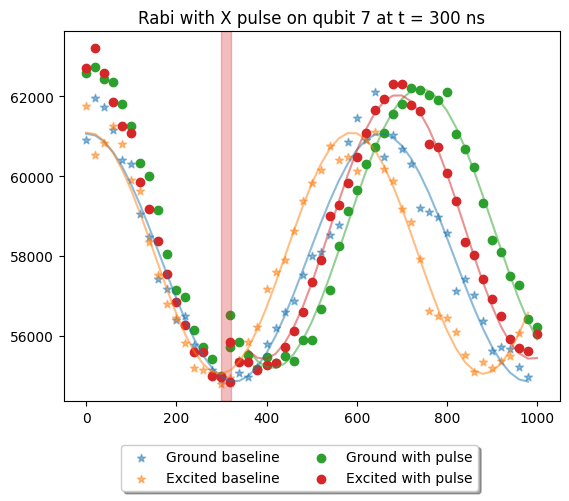

In [10]:
rabi_gnd_results = np.load('rabi_gnd_results.npy')
rabi_exc_results = np.load('rabi_exc_results.npy' )
rabi_pulse_length = np.load('rabi_pulse_length.npy')
strong_X_gnd_results = np.load(f'strong_X_at_{time_X_pulse_start}_gnd_results.npy')
strong_X_exc_results = np.load(f'strong_X_at_{time_X_pulse_start}_exc_results.npy')
strong_total_length = np.load(f'strong_X_at_{time_X_pulse_start}_total_length.npy')


rabi_gnd_results_fitted, params = fit_cosine_curve(rabi_pulse_length,rabi_gnd_results)
rabi_exc_results_fitted, params = fit_cosine_curve(rabi_pulse_length,rabi_exc_results)
strong_X_gnd_results_fitted, params_green = fit_cosine_curve(strong_total_length[strong_total_length>time_X_pulse_start+45],strong_X_gnd_results[strong_total_length>time_X_pulse_start+45])
strong_X_exc_results_fitted, params = fit_cosine_curve(strong_total_length[strong_total_length>time_X_pulse_start+45],strong_X_exc_results[strong_total_length>time_X_pulse_start+45])

# Plotting results
plt.scatter(rabi_pulse_length, rabi_gnd_results, color="C0",label = 'Ground baseline', marker='*',alpha = 0.5)
plt.scatter(rabi_pulse_length, rabi_exc_results, color="C1",label = 'Excited baseline', marker='*',alpha = 0.5)
plt.scatter(strong_total_length[strong_X_gnd_results>10], strong_X_gnd_results[strong_X_gnd_results>10], color="C2", label = 'Ground with pulse')
plt.scatter(strong_total_length[strong_X_exc_results>10], strong_X_exc_results[strong_X_exc_results>10], color="C3", label = 'Excited with pulse')


plt.plot(rabi_pulse_length,rabi_gnd_results_fitted, color="C0",alpha = 0.5)
plt.plot(rabi_pulse_length,rabi_exc_results_fitted, color="C1",alpha = 0.5)
plt.plot(strong_total_length[strong_total_length>time_X_pulse_start+45],strong_X_gnd_results_fitted, color="C2",alpha = 0.5)
plt.plot(strong_total_length[strong_total_length>time_X_pulse_start+45],strong_X_exc_results_fitted, color="C3",alpha = 0.5)

plt.axvspan(time_X_pulse_start, time_X_pulse_start+45*0.9/2, alpha = 0.3, color = 'C3')
plt.legend(bbox_to_anchor=(0.85, -0.1),shadow=True, ncol=2)
plt.savefig('rabi_exc_time_X_pulse_start.png')  # Saving plot as image file
plt.title(f"Rabi with X pulse on qubit 7 at t = {time_X_pulse_start} ns")

Text(0.5, 1.0, 'Rabi with X pulse on qubit 7 at t = 300 ns')

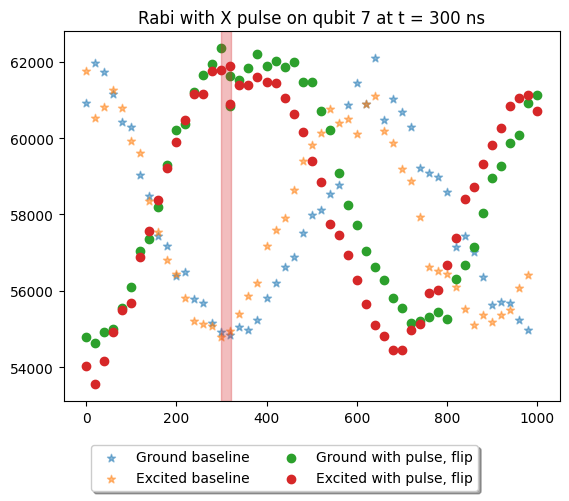

: 

In [11]:
strong_X_gnd_flip = flip_around_average(strong_X_gnd_results)
strong_X_exc_flip = flip_around_average(strong_X_exc_results)

# Plotting results
plt.scatter(rabi_pulse_length, rabi_gnd_results, color="C0",label = 'Ground baseline', marker='*',alpha = 0.5)
plt.scatter(rabi_pulse_length, rabi_exc_results, color="C1",label = 'Excited baseline', marker='*',alpha = 0.5)
plt.scatter(strong_total_length, strong_X_gnd_flip, color="C2", label = 'Ground with pulse, flip')
plt.scatter(strong_total_length, strong_X_exc_flip, color="C3", label = 'Excited with pulse, flip')

plt.axvspan(time_X_pulse_start, time_X_pulse_start+45*0.9/2, alpha = 0.3, color = 'C3')
#plt.scatter(rabi_pulse_length, crtl_exc_results, color="orange")
plt.legend(bbox_to_anchor=(0.85, -0.1),shadow=True, ncol=2)
plt.savefig('rabi_exc_time_X_pulse_start_flip.png')  # Saving plot as image file
plt.title(f"Rabi with X pulse on qubit 7 at t = {time_X_pulse_start} ns")